In [44]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [45]:
df_HD = pd.read_csv('landtradingHD.csv').drop(columns=['Unnamed: 0'])
df_HD.head()

,dien_tich,huong_ban_cong,phong_ngu,id_thanh_pho,ten_thanh_pho,id_quan,ten_quan,so_tang,mat_tien,noi_that,...,gia,gia_m2,du_an,project_name,id_duong,ten_duong,do_rong_duong,do_rong_duong_ml,id_phuong,ten_phuong
0,35.5,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de20,Huyện Hoài Đức,NaN,3.26,NaN,...,1242.5,35.000000,NaN,NaN,5e958eef208d0d6d76490e81,Đường Yên Vĩnh,NaN,NaN,5e5501cceb80a7245175e24f,Xã Kim Chung
1,85.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de20,Huyện Hoài Đức,NaN,NaN,NaN,...,1700.0,20.000000,NaN,NaN,NaN,NaN,2.0,Ngõ ngách,5e5501cceb80a7245175e258,Xã An Thượng
2,50.7,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de20,Huyện Hoài Đức,NaN,4.60,NaN,...,1622.4,32.000000,NaN,NaN,NaN,NaN,2.0,Ngõ ngách,NaN,NaN
3,30.4,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de20,Huyện Hoài Đức,NaN,NaN,NaN,...,1100.0,36.184211,NaN,NaN,NaN,NaN,2.0,Ngõ ngách,5e5501cceb80a7245175e25a,Xã La Phù
4,41.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de20,Huyện Hoài Đức,NaN,NaN,NaN,...,1480.0,36.097561,NaN,NaN,5e958eef208d0d6d76490e54,Đường Lai Xá,NaN,NaN,5e5501cceb80a7245175e24f,Xã Kim Chung


In [46]:
df_HD.info()
print(df_HD.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dien_tich         1756 non-null   float64
 1   huong_ban_cong    17 non-null     object 
 2   phong_ngu         28 non-null     float64
 3   id_thanh_pho      1781 non-null   object 
 4   ten_thanh_pho     1781 non-null   object 
 5   id_quan           1781 non-null   object 
 6   ten_quan          1781 non-null   object 
 7   so_tang           51 non-null     float64
 8   mat_tien          1069 non-null   float64
 9   noi_that          18 non-null     object 
 10  huong_nha         876 non-null    object 
 11  so_do             859 non-null    object 
 12  lat               1779 non-null   float64
 13  long              1779 non-null   float64
 14  gia               1250 non-null   float64
 15  gia_m2            1265 non-null   float64
 16  du_an             7 non-null      object 


In [47]:
df_HD = df_HD.drop_duplicates().reset_index().drop(columns = 'index')

In [48]:
#### Chọn các đặc tính có ảnh hưởng tới giá và giá trên m2
df_HD = df_HD[['dien_tich', 'huong_ban_cong', 'phong_ngu','so_tang','mat_tien',
    'noi_that', 'huong_nha', 'gia','gia_m2','do_rong_duong', 'do_rong_duong_ml']]

In [49]:
df_HD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1722 entries, 0 to 1721
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dien_tich         1698 non-null   float64
 1   huong_ban_cong    17 non-null     object 
 2   phong_ngu         28 non-null     float64
 3   so_tang           51 non-null     float64
 4   mat_tien          1037 non-null   float64
 5   noi_that          18 non-null     object 
 6   huong_nha         845 non-null    object 
 7   gia               1219 non-null   float64
 8   gia_m2            1234 non-null   float64
 9   do_rong_duong     207 non-null    float64
 10  do_rong_duong_ml  236 non-null    object 
dtypes: float64(7), object(4)
memory usage: 148.1+ KB


In [50]:
df_HD.isnull().sum().sort_values(ascending=False)

huong_ban_cong      1705
noi_that            1704
phong_ngu           1694
so_tang             1671
do_rong_duong       1515
do_rong_duong_ml    1486
huong_nha            877
mat_tien             685
gia                  503
gia_m2               488
dien_tich             24
dtype: int64

In [52]:
df_HD.isnull().sum()

dien_tich             24
huong_ban_cong      1705
phong_ngu           1694
so_tang             1671
mat_tien             685
noi_that            1704
huong_nha            877
gia                  503
gia_m2               488
do_rong_duong       1515
do_rong_duong_ml    1486
dtype: int64

(1722, 11)

In [55]:
df_HD.isnull().sum()

dien_tich             24
huong_ban_cong      1705
phong_ngu           1694
so_tang             1671
mat_tien             685
noi_that            1704
huong_nha            877
gia                  503
gia_m2               488
do_rong_duong       1515
do_rong_duong_ml    1486
dtype: int64

In [53]:
df_HD.isnull().count().sort_values(ascending=False)

dien_tich           1722
huong_ban_cong      1722
phong_ngu           1722
so_tang             1722
mat_tien            1722
noi_that            1722
huong_nha           1722
gia                 1722
gia_m2              1722
do_rong_duong       1722
do_rong_duong_ml    1722
dtype: int64

,Total,Percent
huong_ban_cong,1705,0.990128
noi_that,1704,0.989547
phong_ngu,1694,0.983740
so_tang,1671,0.970383
do_rong_duong,1515,0.879791
do_rong_duong_ml,1486,0.862950
huong_nha,877,0.509292
mat_tien,685,0.397793
gia,503,0.292102
gia_m2,488,0.283391


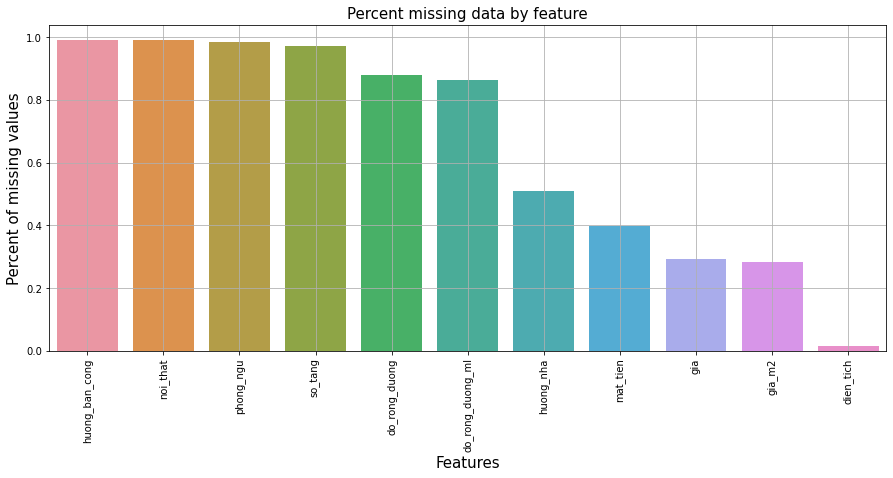

In [8]:
# Nhìn dữ trên có thể thấy rằng rất nhiều cột có dữ liệu missing
total = df_HD.isnull().sum().sort_values(ascending=False)
percent = (df_HD.isnull().sum()/df_HD.isnull().count()).sort_values(ascending=False)
# phần trăm khuyết = số lượng khuyết / tổng số dòng.
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# Visualization missing data
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.grid()
missing_data

In [9]:
df_HD

,dien_tich,huong_ban_cong,phong_ngu,so_tang,mat_tien,noi_that,huong_nha,gia,gia_m2,do_rong_duong,do_rong_duong_ml
0,35.5,NaN,NaN,NaN,3.26,NaN,NaN,1242.5,35.000000,NaN,NaN
1,85.0,NaN,NaN,NaN,NaN,NaN,KXĐ,1700.0,20.000000,2.0,Ngõ ngách
2,50.7,NaN,NaN,NaN,4.60,NaN,KXĐ,1622.4,32.000000,2.0,Ngõ ngách
3,30.4,NaN,NaN,NaN,NaN,NaN,KXĐ,1100.0,36.184211,2.0,Ngõ ngách
4,41.0,NaN,NaN,NaN,NaN,NaN,NaN,1480.0,36.097561,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1717,32.0,NaN,NaN,NaN,NaN,NaN,NaN,1040.0,32.500000,NaN,NaN
1718,50.0,NaN,NaN,NaN,NaN,NaN,NaN,1710.0,34.200000,NaN,NaN
1719,47.0,NaN,NaN,NaN,5.00,NaN,KXĐ,3650.0,77.659574,7.0,Ngõ 3 ô tô tránh
1720,39.0,NaN,NaN,NaN,NaN,NaN,KXĐ,NaN,NaN,NaN,NaN


In [10]:
# các giá trị hướng ban công, nội thất, phòng ngủ, số tầng gần 100% missing nên quyết định xóa
df_HD.drop(columns=['huong_ban_cong','noi_that','so_tang','phong_ngu'], inplace=True)

In [11]:
# xử lý feature hướng nhà 
df_HD['huong_nha'].value_counts()
# Hướng nhà KXĐ có 147 giá trị và theo biểu đồ thì có thể thấy hướng nhà có trên 50% là missing
# => có thể đánh giá rằng 50% dữ liệu bị missing là KXĐ vì vậy chúng ta sẽ fill vào vị trí các giá trị missing là KXĐ
df_HD['huong_nha'].fillna("KXĐ",inplace=True)

print(df_HD['huong_nha'].isna().sum())
df_HD['huong_nha'].replace(['Tây-Nam','Đông-Nam','Tây-Bắc','Đông-Bắc'],['Tây Nam','Đông Nam','Tây Bắc','Đông Bắc'],inplace=True)

0


In [12]:
# xử lý feature do_rong_duong_ml
# điền KXĐ vào Nan
df_HD['do_rong_duong_ml'].fillna("KXĐ",inplace=True)
df_HD['do_rong_duong_ml'].value_counts()

KXĐ                   1486
Ngõ 1 ô tô              84
Ngõ 4 ô tô trở lên      51
Ngõ 4 ô tô tránh        36
Ngõ ngách               34
Ngõ 3 ô tô tránh        16
Ngõ 2 ô tô tránh        15
Name: do_rong_duong_ml, dtype: int64

In [13]:
# xử lý feature dien_tich, do_rong_duong ,giá, mat_tien sẽ fill mean : fill mean
df_HD['do_rong_duong'].fillna(df_HD['do_rong_duong'].mean(),inplace=True)
df_HD['mat_tien'].fillna(df_HD['mat_tien'].mean(),inplace=True)
df_HD['do_rong_duong'].fillna(df_HD['do_rong_duong'].mean(),inplace=True)
df_HD['gia'].fillna(df_HD['gia'].mean(),inplace=True)
df_HD['dien_tich'].fillna(df_HD['dien_tich'].mean(),inplace=True) 

In [14]:
# xóa feature giá/m2
df_HD.drop(columns=['gia_m2'], inplace=True)

In [15]:
df_HD.isna().sum()

dien_tich           0
mat_tien            0
huong_nha           0
gia                 0
do_rong_duong       0
do_rong_duong_ml    0
dtype: int64

# Xử lý giá trị ngoại lai

<AxesSubplot:>

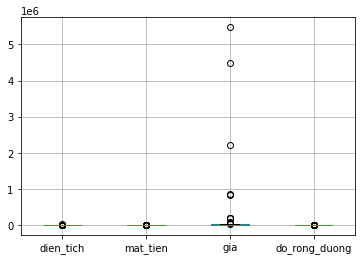

In [16]:
df_HD.boxplot()

In [17]:
Q1 = df_HD.quantile(0.25)
Q3 = df_HD.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

dien_tich           23.000000
mat_tien             4.012276
gia              13170.548468
do_rong_duong        0.000000
dtype: float64


In [18]:
# lọc dữ liệu ngoại lai
df_HD = df_HD[~((df_HD < (Q1 - 1.5 * IQR)) | (df_HD > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\ACERNI~1\AppData\Local\Temp/ipykernel_16856/2998526406.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_HD = df_HD[~((df_HD < (Q1 - 1.5 * IQR)) | (df_HD > (Q3 + 1.5 * IQR))).any(axis=1)]


<AxesSubplot:>

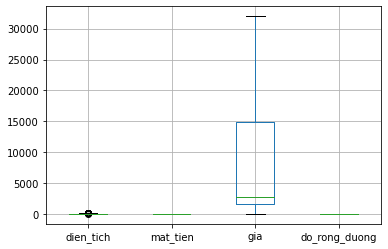

In [19]:
df_HD.boxplot()

# Chuẩn bị dữ liệu 

In [20]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from scipy.stats import f_oneway

In [21]:
df_HD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1345 entries, 0 to 1721
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dien_tich         1345 non-null   float64
 1   mat_tien          1345 non-null   float64
 2   huong_nha         1345 non-null   object 
 3   gia               1345 non-null   float64
 4   do_rong_duong     1345 non-null   float64
 5   do_rong_duong_ml  1345 non-null   object 
dtypes: float64(4), object(2)
memory usage: 73.6+ KB


In [22]:
df_HD.head()

,dien_tich,mat_tien,huong_nha,gia,do_rong_duong,do_rong_duong_ml
0,35.5,3.260000,KXĐ,1242.5,9.231401,KXĐ
4,41.0,8.012276,KXĐ,1480.0,9.231401,KXĐ
5,33.0,8.012276,Đông Nam,880.0,9.231401,KXĐ
6,60.0,8.012276,Tây Bắc,2340.0,9.231401,KXĐ
10,50.0,8.012276,KXĐ,1975.0,9.231401,KXĐ


In [23]:
df_target = pd.get_dummies(df_HD, columns =['huong_nha', 'do_rong_duong_ml'], dummy_na=True)

In [24]:
y = df_target["gia"].values
X = df_target.drop("gia", axis=1).values 

In [25]:
# Dùng lệnh reshape để định dạng y thành vector cột (mảng 1 cột)
y = y.reshape(-1,1)
y.shape

(1345, 1)

In [26]:
# # chia du lieu 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình

In [27]:
reg = LinearRegression().fit(X_train, y_train)

In [28]:
print("Mô hình hồi quy tuyến tính đã được huấn luyện, có các tham số:")
print("Intercept ( hệ số chặn ) =", reg.intercept_)
print("Coefficients ( hệ số góc ) =", reg.coef_)

Mô hình hồi quy tuyến tính đã được huấn luyện, có các tham số:
Intercept ( hệ số chặn ) = [1.28775399e+09]
Coefficients ( hệ số góc ) = [[ 9.91272229e+01 -1.46244748e+02 -1.39492332e+08  5.08306495e+03
   4.51647721e+03  4.86191604e+03  3.81064473e+03  2.32484484e+03
   3.45126721e+03  3.83511194e+03  4.00143106e+03  3.65186429e+03
   0.00000000e+00 -4.70006739e+04 -4.86925812e+04  0.00000000e+00]]


In [29]:
pred = reg.predict(X_test)
print(mean_squared_error(y_test, pred))
print(mean_absolute_percentage_error(y_test, pred)) 

32968874.08053275
8.715105756148535


In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 

In [31]:
## cây quyết định
regressor = DecisionTreeRegressor(random_state = 42) 
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [32]:
prediction = regressor.predict(X_test)
print(mean_squared_error(y_test, prediction))
print(mean_absolute_percentage_error(y_test, prediction))

40285374.96299595
6.454256950442405


In [33]:
## randomforest
# random forest
regr = RandomForestRegressor(max_depth=2, random_state=42)
regr.fit(X_train, y_train)

C:\Users\ACERNI~1\AppData\Local\Temp/ipykernel_16856/3929511254.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


RandomForestRegressor(max_depth=2, random_state=42)

In [34]:
predict = regr.predict(X_test)
print(mean_squared_error(y_test, predict))
print(mean_absolute_percentage_error(y_test, predict))

32862919.05084963
9.319866034188355


In [35]:
df_HD.corr() 

,dien_tich,mat_tien,gia,do_rong_duong
dien_tich,1.000000,0.127004,0.255673,NaN
mat_tien,0.127004,1.000000,-0.005966,NaN
gia,0.255673,-0.005966,1.000000,NaN
do_rong_duong,NaN,NaN,NaN,NaN


In [36]:
from sklearn.decomposition import PCA

In [37]:
df_HDcorr = df_target.corr()
df_HDcorr

,dien_tich,mat_tien,gia,do_rong_duong,huong_nha_Bắc,huong_nha_KXĐ,huong_nha_Nam,huong_nha_Tây,huong_nha_Tây Bắc,huong_nha_Tây Nam,huong_nha_Đông,huong_nha_Đông Bắc,huong_nha_Đông Nam,huong_nha_nan,do_rong_duong_ml_KXĐ,do_rong_duong_ml_Ngõ 1 ô tô,do_rong_duong_ml_nan
dien_tich,1.000000,0.127004,0.255673,NaN,-0.034387,0.000094,-0.021315,-0.047619,-0.028929,0.052733,0.006278,0.042558,0.013637,NaN,0.045602,-0.045602,NaN
mat_tien,0.127004,1.000000,-0.005966,NaN,-0.080236,0.332081,-0.066477,-0.119940,-0.113438,-0.075173,-0.080168,-0.053466,-0.133666,NaN,-0.037254,0.037254,NaN
gia,0.255673,-0.005966,1.000000,NaN,0.005148,0.051392,0.045712,-0.022302,-0.082889,-0.012918,0.000283,0.004517,-0.025947,NaN,0.069228,-0.069228,NaN
do_rong_duong,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
huong_nha_Bắc,-0.034387,-0.080236,0.005148,NaN,1.000000,-0.191617,-0.035205,-0.032923,-0.045718,-0.043073,-0.037371,-0.032586,-0.055621,NaN,-0.008084,0.008084,NaN
huong_nha_KXĐ,0.000094,0.332081,0.051392,NaN,-0.191617,1.000000,-0.245288,-0.229388,-0.318536,-0.300107,-0.260378,-0.227040,-0.387533,NaN,-0.020954,0.020954,NaN
huong_nha_Nam,-0.021315,-0.066477,0.045712,NaN,-0.035205,-0.245288,1.000000,-0.042145,-0.058524,-0.055138,-0.047838,-0.041713,-0.071200,NaN,0.030954,-0.030954,NaN
huong_nha_Tây,-0.047619,-0.119940,-0.022302,NaN,-0.032923,-0.229388,-0.042145,1.000000,-0.054730,-0.051563,-0.044737,-0.039009,-0.066585,NaN,0.028947,-0.028947,NaN
huong_nha_Tây Bắc,-0.028929,-0.113438,-0.082889,NaN,-0.045718,-0.318536,-0.058524,-0.054730,1.000000,-0.071603,-0.062124,-0.054170,-0.092462,NaN,0.019872,-0.019872,NaN
huong_nha_Tây Nam,0.052733,-0.075173,-0.012918,NaN,-0.043073,-0.300107,-0.055138,-0.051563,-0.071603,1.000000,-0.058530,-0.051036,-0.087113,NaN,0.016469,-0.016469,NaN
